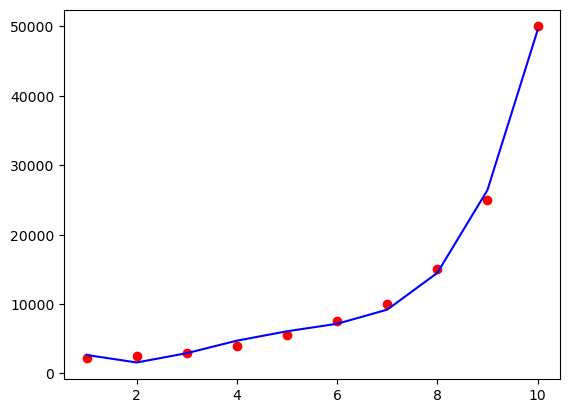

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_excel("maaslar.xlsx")
veriler

x = veriler.iloc[:, 1:2]
x

y = veriler.iloc[:, 2:]
y

X = x.values
Y = y.values

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)

X_poly = poly_reg.fit_transform(X) # X'in polinimal hali
X_poly

lin_reg = LinearRegression()

lin_reg.fit(X,Y)

lin_reg.fit(X_poly, y)

plt.scatter(X,Y, color = 'red')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color = 'blue') # modelin gösterilmesi
plt.show()

Lineer regresyon üzerinden yapılan R-square hesaplaması

In [45]:
r2_score(Y, lin_reg.predict(X))

ValueError: X has 1 features, but LinearRegression is expecting 5 features as input.

Polinomal regresyon üzerinden yapılan R-square hesaplaması

In [36]:
r2_score(Y, lin_reg.predict(poly_reg.fit_transform(X)))

0.9973922891706613

# R-SQUARE ==> En yukarıda import edildi.
Parametreler: bağımlı değişken, tahmin

In [42]:
from sklearn.metrics import r2_score

# Support Vector Regression(Destek Vektör Regresyonu)(SVR)

SVR'nin aşırı veya aykırı verilere karşı hassasiyeti yüksek olduğundan scaler kullanılmalı.

In [15]:
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
x_olcekli = sc1.fit_transform(X)
sc2 = StandardScaler()
y_olcekli = sc2.fit_transform(Y)

from sklearn.svm import SVR # SVR kullanmak için olan kütüphane

svr_reg = SVR(kernel = 'rbf') # kernel = Kullanılacak fonksiyonun belirtilmesi için kullanıldı. 'rbf' gaussian fonksiyonudur.
svr_reg.fit(x_olcekli, y_olcekli.ravel()) 
# SVR fonksiyonu bağımlı değişkeni 1 boyutlu bekler ama y_olcekli bağımlı değişkeni 2 boyutlu. 
# Bağımlı değişkeni 1 boyutlu hale getirmek için y_olcekli değişkenine ravel() fonksiyonu uygulandı.



SVR()

In [16]:
svr_tahmin = svr_reg.predict(x_olcekli) # Her bir x_olcekli için tahmin ver.
svr_tahmin

array([-0.61985717, -0.629033  , -0.56735658, -0.49662252, -0.44630564,
       -0.36590427, -0.14129748,  0.28510258,  0.78163737,  1.08500645])

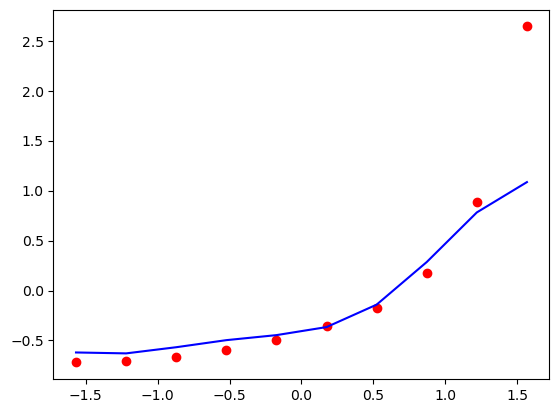

In [17]:
plt.scatter(x_olcekli, y_olcekli, color='red') # verilerin tablo üzerinde dağılımları
plt.plot(x_olcekli, svr_tahmin, color='blue') # Her bir x_olcekli için svr_tahmin'i uygula.
plt.show()

SVR tahmini üzerinden yapılan R-square hesaplaması

In [32]:
r2_score(y_olcekli,svr_tahmin)

0.7513836788854973

# KARAR AĞACI(DECISION TREE)

In [22]:
from sklearn.tree import DecisionTreeRegressor 

dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(X,Y)

dt_reg_tahmin = dt_reg.predict(X)
dt_reg_tahmin

array([ 2250.,  2500.,  3000.,  4000.,  5500.,  7500., 10000., 15000.,
       25000., 50000.])

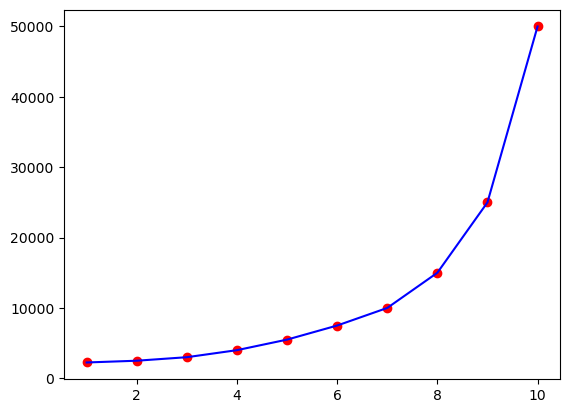

In [23]:
plt.scatter(X, Y, color='red')
plt.plot(X, dt_reg_tahmin, color='blue')
plt.show()

Decision tree tahmini üzerinden yapılan R-square hesaplaması

In [28]:
r2_score(Y, dt_reg_tahmin)

1.0

# RANDOM FOREST 

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=10 ,random_state=0) # n_estimators parametresi kaç tane karar ağacının oluşturulacağını belirler.


rf_reg.fit(X,Y.ravel())

rf_reg_tahmin = rf_reg.predict(X)
rf_reg_tahmin

array([ 2300.,  2450.,  2950.,  3700.,  5050.,  6800., 10500., 15250.,
       23500., 42500.])

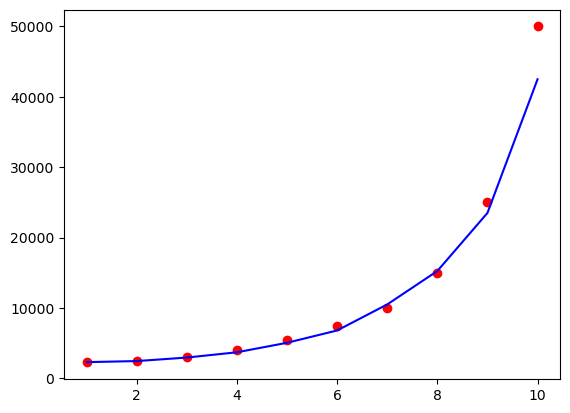

In [25]:
plt.scatter(X,Y, color='red')
plt.plot(X, rf_reg_tahmin, color='blue')
plt.show()

Random forest tahmini üzerinden yapılan R-square hesaplaması

In [31]:
r2_score(Y, rf_reg_tahmin)

0.9704434230386582